# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
#weather_api_key = 'dcc4902355287fcca79c61c93837a37c'


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = '/Users/jacobcortez/Documents/GitHub/DS_Repos/HW_Repo/python_api_challenge/resources/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Assign URL variable
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
query_url = f'{base_url}appid={weather_api_key}&units={units}&q='


query_url


# api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}


'http://api.openweathermap.org/data/2.5/weather?appid=dcc4902355287fcca79c61c93837a37c&units=imperial&q='

## Generate Cities List

In [60]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [61]:
# My lists needed to make scatter plot graphs
# Make my empty lists for the data I need to display in my DF.

lat_list = []
long_list = []
temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
city_name_list = []
country_name_list = []
unquie_id_list = []

# Run loop for data to place in my lists

for city in cities:

    response_json = requests.get(query_url + city).json()


    try:
     lat = response_json['coord']['lat']
     lat_list.append(lat)

     long = response_json['coord']['lat']
     long_list.append(long)

     temp = response_json['main']['temp']
     temp_list.append(temp)

     humidity = response_json['main']['humidity']
     humidity_list.append(humidity)

     cloudiness = response_json['clouds']['all']
     cloudiness_list.append(cloudiness)

     wind_speed = response_json['wind']['speed']
     wind_speed_list.append(wind_speed)

    # Extra lists to make data frame easier to build
     city_name = response_json['name']
     city_name_list.append(city_name)

     country_name = response_json['sys']['country']
     country_name_list.append(country_name)

     unquie_id = response_json['id']
     unquie_id_list.append(unquie_id)
    except:
        print('This code does not work')

print(city_name_list)



This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does n

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [62]:
# Create a DF from all lists and display 
weather_df = pd.DataFrame({'City ID': unquie_id_list,'City': city_name_list, 'Country': country_name_list, 'Latitude': lat_list,'Longitude': long_list, 'Temperature': temp_list, 'Humidity': humidity_list,'Cloudiness': cloudiness_list, 'Wind Speed': wind_speed_list})
weather_df.head()

,City ID,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,2126199,Cherskiy,RU,68.7500,68.7500,-6.03,100,96,3.51
1,3372760,Praia da Vitória,PT,38.7333,38.7333,66.45,82,75,10.83
2,3380290,Sinnamary,GF,5.3833,5.3833,78.44,88,100,11.95
3,1507390,Dikson,RU,73.5069,73.5069,8.06,87,99,12.55
4,2122090,Pevek,RU,69.7008,69.7008,10.90,93,100,7.14


In [63]:
weather_df.to_csv('/Users/jacobcortez/Documents/GitHub/DS_Repos/HW_Repo/python_api_challenge/weather_py/weather_df.csv', index=False,header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [64]:
# Sort values of cities that have humidity over 100%.

weather_df.sort_values(['Humidity'],ascending = False)

# There is none!

,City ID,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,2126199,Cherskiy,RU,68.7500,68.7500,-6.03,100,96,3.51
155,5905393,Bonavista,CA,48.6499,48.6499,53.60,100,100,7.40
145,3041732,Mariehamn,AX,60.0973,60.0973,26.46,100,0,1.14
61,3416888,Grindavik,IS,63.8424,63.8424,46.87,100,90,10.36
568,3095795,Kołobrzeg,PL,54.1757,54.1757,44.46,100,70,9.19
...,...,...,...,...,...,...,...,...,...
90,5478673,Meadow Lake,US,34.8014,34.8014,70.43,16,82,16.64
421,2439155,Tanout,NE,14.9709,14.9709,85.19,16,69,10.76
286,2447513,Arlit,NE,18.7369,18.7369,85.77,14,7,9.91
463,1160939,Iranshahr,IR,27.2025,27.2025,63.57,14,0,2.51


In [65]:
weather_df.sort_values(['Temperature'],ascending = True)


,City ID,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
212,2121025,Srednekolymsk,RU,67.4500,67.4500,-10.12,96,36,4.59
0,2126199,Cherskiy,RU,68.7500,68.7500,-6.03,100,96,3.51
411,2028164,Deputatsky,RU,69.3000,69.3000,-2.79,99,100,2.55
24,2126123,Chokurdakh,RU,70.6333,70.6333,-2.27,98,100,6.53
56,3831208,Qaanaaq,GL,77.4840,77.4840,-1.23,57,0,8.30
...,...,...,...,...,...,...,...,...,...
53,2457161,Gao,ML,16.6362,16.6362,87.64,35,87,8.12
443,3584003,Puerto El Triunfo,SV,13.2833,13.2833,87.69,83,63,3.20
336,3664980,Boa Vista,BR,2.8197,2.8197,87.78,58,75,5.75
170,3733380,Campoverde,PE,-8.4753,-8.4753,89.29,41,88,2.98


In [71]:
weather_df.head(['Latitude'])

TypeError: cannot do positional indexing on RangeIndex with these indexers [['Latitude']] of type list

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

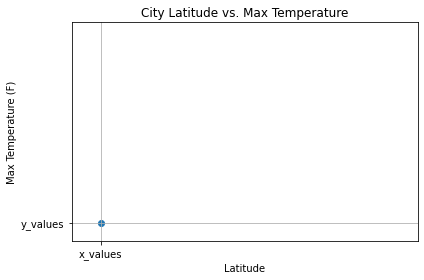

In [70]:
# Plot scatter plot
x_values = weather_df['Latitude']
y_values = weather_df['Temperature']
plt.scatter('x_values','y_values')
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.ylim(-10, 110)
plt.xlim(-10, 110)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

## Latitude vs. Humidity Plot

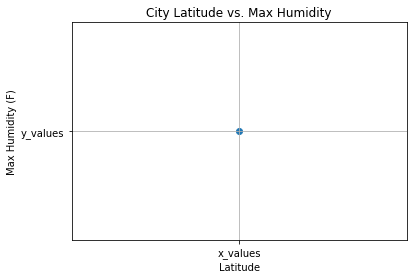

In [67]:
# Plot scatter plot
x_values = weather_df['Latitude']
y_values = weather_df['Humidity']
plt.scatter('x_values','y_values')
plt.title('City Latitude vs. Max Humidity')
plt.xlabel('Latitude')
plt.ylabel('Max Humidity (F)')
plt.grid(zorder=0)

## Latitude vs. Cloudiness Plot

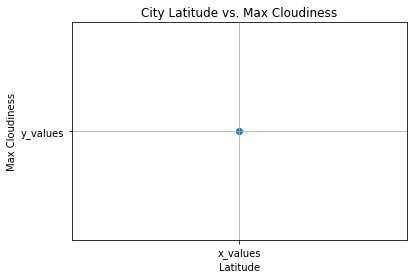

In [68]:
# Plot scatter plot
x_values = weather_df['Latitude']
y_values = weather_df['Cloudiness']
plt.scatter('x_values','y_values')
plt.title('City Latitude vs. Max Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Max Cloudiness')
plt.grid(zorder=0)

## Latitude vs. Wind Speed Plot

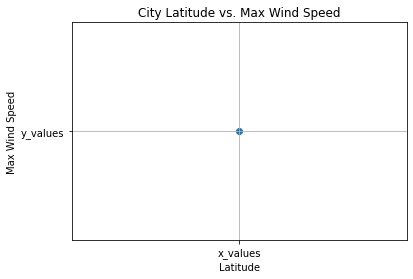

In [69]:
# Plot scatter plot
x_values = weather_df['Latitude']
y_values = weather_df['Wind Speed']
plt.scatter('x_values','y_values')
plt.title('City Latitude vs. Max Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Max Wind Speed')
plt.grid(zorder=0)

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression